In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2=df.drop(['area_type','society'],axis='columns')

In [10]:
df2.head()

,availability,location,size,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df2.isnull().sum()

availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [12]:
df2.groupby('balcony')['balcony'].count()

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

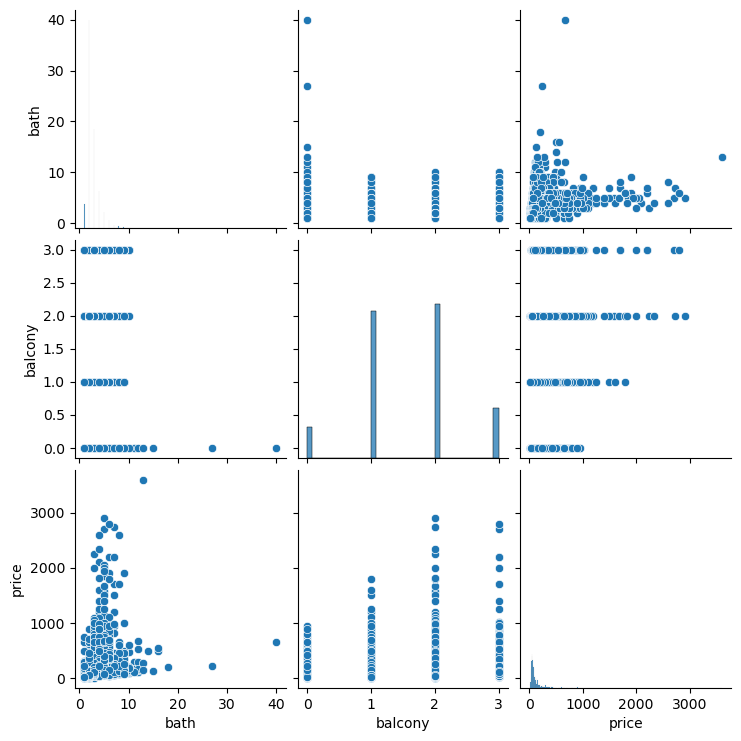

In [13]:
sns.pairplot(df2)

In [14]:
df.corr()

C:\Users\neera\AppData\Local\Temp\ipykernel_15212\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [15]:
df2=df2.drop('balcony',axis='columns')

In [16]:
df2.groupby('availability').count()

,location,size,total_sqft,bath,price
availability,,,,,
14-Jul,1,1,1,1,1
14-Nov,1,1,1,1,1
15-Aug,1,1,1,1,1
15-Dec,1,1,1,1,1
15-Jun,1,1,1,1,1
...,...,...,...,...,...
22-Mar,3,3,3,3,3
22-May,10,10,10,8,10
22-Nov,2,2,2,2,2


In [17]:
df2=df2.drop('availability',axis='columns')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [19]:
df3=df2.dropna()

In [20]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
df3.shape

(13246, 5)

In [22]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
df3['rooms']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\neera\AppData\Local\Temp\ipykernel_15212\1132583801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rooms']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [24]:
df3.head()

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [25]:
df3['rooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [26]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df3[~df3['total_sqft'].apply(is_float)].tail(10)

,location,size,total_sqft,bath,price,rooms
12544,Hebbal,4 BHK,4000 - 4450,6.0,359.000,4
12560,Hosa Road,3 BHK,142.84Sq. Meter,3.0,110.000,3
12652,Billamaranahalli,2 Bedroom,300Sq. Yards,2.0,150.000,2
12791,Bannerghatta Road,2 BHK,1115 - 1130,2.0,61.740,2
12955,Thanisandra,3 BHK,1437 - 1629,3.0,75.885,3
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2
13299,Whitefield,4 BHK,2830 - 2882,5.0,154.500,4


In [28]:
def convert_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_to_num)

In [30]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
rooms          0
dtype: int64

In [31]:
# price per squarefeet

In [32]:
df5=df4.copy()

In [33]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [34]:
df5.head()

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
len(df5['location'].unique())

1304

In [36]:
df5['location']=df5['location'].apply(lambda x:x.strip())

In [37]:
location_stat=df5.groupby('location')['location'].agg('count')

In [38]:
location_stat

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [39]:
location_stat_less10=location_stat[location_stat<=10]

In [40]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stat_less10 else x)

In [41]:
len(df5['location'].unique())

242

In [42]:
df5[df5['total_sqft']/df5['rooms']<150].count()

location          149
size              149
total_sqft        149
bath              149
price             149
rooms             149
price_per_sqft    149
dtype: int64

In [43]:
df5.shape

(13246, 7)

In [44]:
df6=df5[~(df5['total_sqft']/df5['rooms']<300)]

In [45]:
df6.shape

(12502, 7)

In [46]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

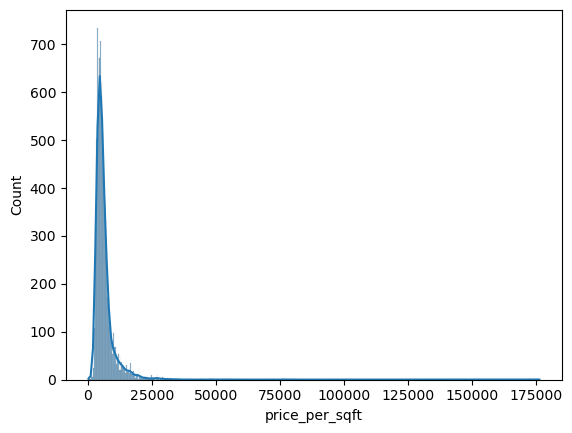

In [47]:
sns.histplot(df6['price_per_sqft'],kde=True)

In [48]:
def remove_outliers(df):
    df_final=pd.DataFrame()
    for key , subdf in df.groupby('location'):
        Q1 = subdf['price_per_sqft'].quantile(0.25)
        Q3 = subdf['price_per_sqft'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_subdf = subdf[(subdf['price_per_sqft'] >= lower_bound) & (subdf['price_per_sqft'] <= upper_bound)]
        df_final = pd.concat([df_final, filtered_subdf], ignore_index=True)
    return df_final     

In [49]:
df7=remove_outliers(df6)

In [50]:
df7.shape

(11582, 7)

In [51]:
df7.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'rooms',
       'price_per_sqft'],
      dtype='object')

In [52]:
def plot_bhk_prices(df, location):
    
    location_df = df[df['location'] == location]
    
    plt.figure(figsize=(10, 6))
    
    # Plot for 2 BHK
    bhk_2 = location_df[location_df['rooms'] == 2]
    plt.scatter(bhk_2['price_per_sqft'], bhk_2['price'], color='blue', label='2 BHK')
    
    # Plot for 3 BHK
    bhk_3 = location_df[location_df['rooms'] == 3]
    plt.scatter(bhk_3['price_per_sqft'], bhk_3['price'], color='green', label='3 BHK')
    
    plt.xlabel('Price per Square Foot')
    plt.ylabel('Price')
    plt.title(f'2 BHK vs 3 BHK Prices in {location}')
    plt.legend()
    plt.show()


In [53]:
df7['location'].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

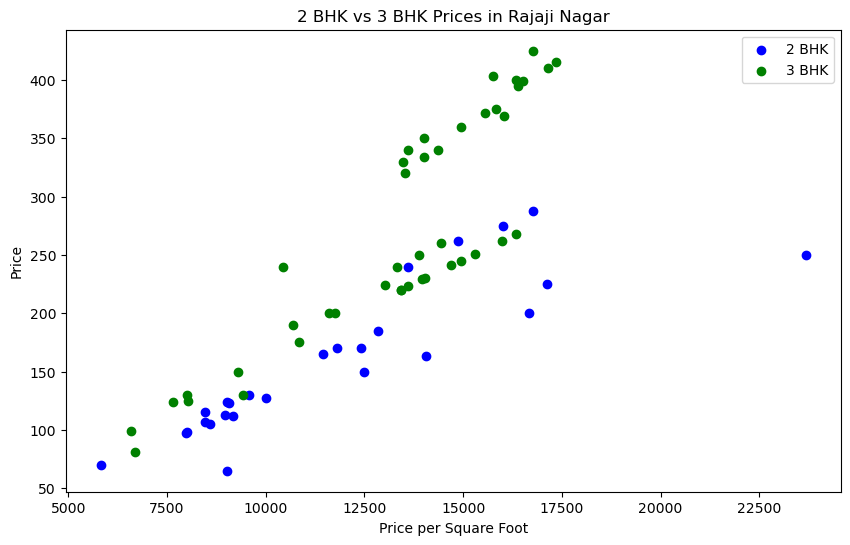

In [54]:
plot_bhk_prices(df7,'Rajaji Nagar')

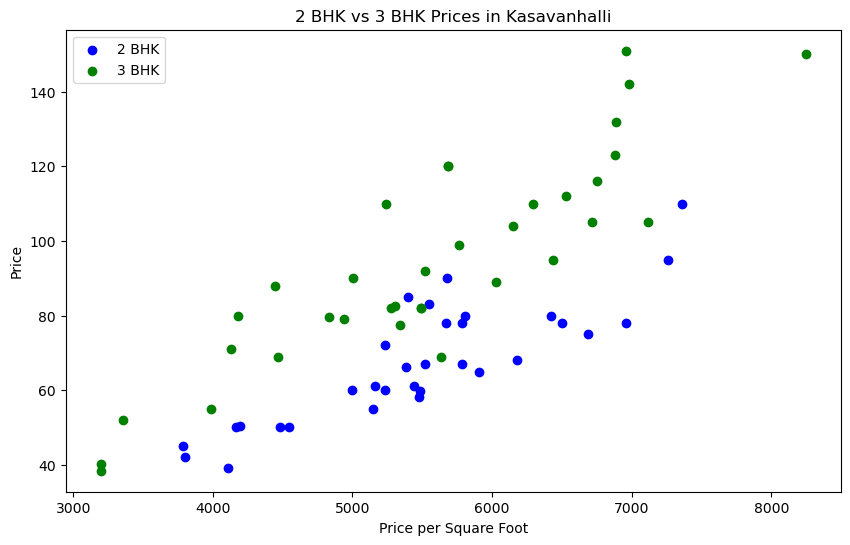

In [55]:
plot_bhk_prices(df7,'Kasavanhalli')

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for rooms, bhk_df in location_df.groupby('rooms'):
            bhk_stats[rooms] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for rooms, bhk_df in location_df.groupby('rooms'):
            stats = bhk_stats.get(rooms - 1)
            if stats and stats['count'] > 5:
                indices_to_exclude = bhk_df[bhk_df['price_per_sqft'] < stats['mean']].index.values
                exclude_indices = np.append(exclude_indices, indices_to_exclude)
    
    return df.drop(exclude_indices, axis='index')

In [57]:
df8=remove_bhk_outliers(df7)

In [58]:
df8.shape

(8333, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

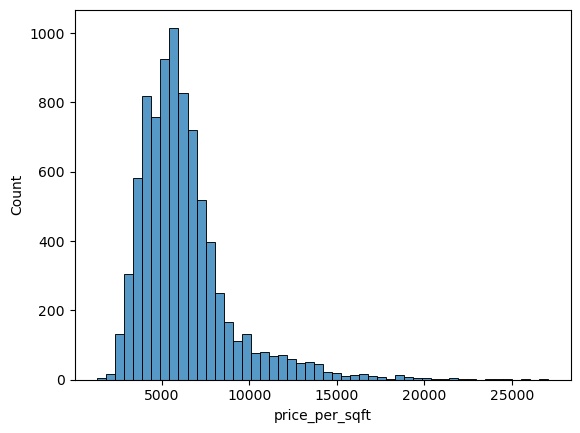

In [59]:
sns.histplot(df8['price_per_sqft'],bins=50)

In [60]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  7.,  6.,  9., 12., 10., 16., 13.])

In [61]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,rooms,price_per_sqft
6149,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9813,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9902,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
10640,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10974,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [62]:
df9=df8[df8.bath<df8.rooms+2]

In [63]:
df9.shape

(8244, 7)

In [64]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [65]:
df10.head()

,location,total_sqft,bath,price,rooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


In [66]:
dummies=pd.get_dummies(df10['location']) # one hot encoding

In [67]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [68]:
df11.head()

,location,total_sqft,bath,price,rooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2400.0,4.0,450.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,rooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,450.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df12.shape

(8244, 245)

In [71]:
# droping the dependant variables that is price

In [72]:
X=df12.drop('price',axis='columns')

In [73]:
y=df12.price

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [75]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)

LinearRegression()

In [76]:
lr_clf.score(X_test,y_test)

0.8016260575481122

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [78]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [79]:
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81050994, 0.77332072, 0.80117951, 0.81071302, 0.77707201])

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    
    for algo_name, config in algos.items():
        cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [81]:
find_best_model_using_gridsearchcv(X, y)

C:\Users\neera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\neera\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\neera\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\neera\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\neera\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.794559,{'fit_intercept': True}
1,lasso,0.690666,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.767139,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [82]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]


In [83]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\neera\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


180.77256521362284

In [85]:
import pickle
with open('home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [86]:
import json
columns={'data_columns':[col.lower() for col in X.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))